Albania GDP: 11285 Life: 78.194
Algeria GDP: 13328 Life: 76.298
Barbados GDP: 10160 Life: 78.888
Bosnia and Herzegovina GDP: 10576 Life: 76.998
China GDP: 12320 Life: 76.21
Colombia GDP: 12963 Life: 76.732
Costa Rica GDP: 13986 Life: 79.738
Ecuador GDP: 10536 Life: 76.365
Iran GDP: 15529 Life: 76.047
Lebanon GDP: 12683 Life: 78.8
Montenegro GDP: 18244 Life: 76.568
Peru GDP: 11540 Life: 76.044
Sri Lanka GDP: 11118 Life: 76.482
Thailand GDP: 14341 Life: 76.403
Tunisia GDP: 10621 Life: 76.115


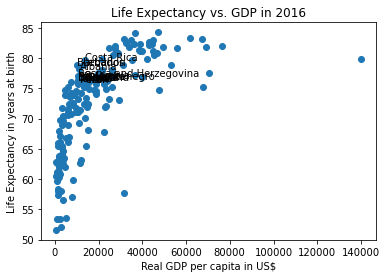

In [45]:
import matplotlib.pyplot as pyplot
import pandas as pd
import numpy as np
import statistics 

## What year to extract the data from  
year = 2016

# Read the csv-file with GDP and extract the data for the chosen year
gdp_df = pd.read_csv("./datasets/gdp.csv")
gdp_df = gdp_df.loc[gdp_df["Year"] == year]

# Read the csv-file with Life Expectancy and extract the data for the chosen year
life_df = pd.read_csv("./datasets/life.csv")
life_df = life_df.loc[life_df["Year"] == year]

# Filter the dataframes to only contain the same contries 
life_df = life_df[life_df["Entity"].isin(gdp_df["Entity"])]
gdp_df = gdp_df[gdp_df["Entity"].isin(life_df["Entity"])]

# Extract all the GDP values into the varible xValues
xValues = gdp_df["Real GDP per capita in 2011US$, multiple benchmarks (Maddison Project Database (2018))"]
# Extract all the Life Expectancy values into the variable yValues
yValues = life_df["Life expectancy"]

# Set up the pyplot as a scatterplot and map the lists xValues and yValues to respective axises
testFig, ax = pyplot.subplots()

ax.scatter(xValues, yValues)
# Set up labels and title for the plot
pyplot.xlabel('Real GDP per capita in US$')
pyplot.ylabel('Life Expectancy in years at birth')
pyplot.title("Life Expectancy vs. GDP in 2016")
# Set a variable fig to point to the current figure (the scatter plot)
fig = pyplot.gcf()

# Draw and show the plot
pyplot.draw()
pyplot.show()
# Save the current figure into a png image with the name scatterplot
fig.savefig("scatterplot")


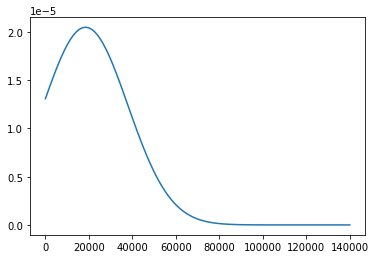

In [119]:
import matplotlib.pyplot as pyplot
import pandas as pd
import numpy as np
import statistics 

import scipy.stats as sc

gdp_code = "Real GDP per capita in 2011US$, multiple benchmarks (Maddison Project Database (2018))"
life_code = 'Life expectancy'

## What year to extract the data from  
year = 2016

# Read the csv-file with GDP and extract the data for the chosen year
gdp_df = pd.read_csv("./datasets/gdp.csv")
gdp_df = gdp_df.loc[gdp_df["Year"] == year]

# Read the csv-file with Life Expectancy and extract the data for the chosen year
life_df = pd.read_csv("./datasets/life.csv")
life_df = life_df.loc[life_df["Year"] == year]

# Filter the dataframes to only contain the same contries 
life_df = life_df[life_df["Entity"].isin(gdp_df["Entity"])]
gdp_df = gdp_df[gdp_df["Entity"].isin(life_df["Entity"])]

# Extract all the Life Expectancy values into the variable yValues
yValues = life_df["Life expectancy"]
#  Extract all the GDP values into the variable xValues
xValues = gdp_df["Real GDP per capita in 2011US$, multiple benchmarks (Maddison Project Database (2018))"]

# The standard deviation of the life expectancy dataset
standard_deviation = statistics.stdev(yValues)
# The mean of the life expectancy dataset
mean = np.sum(yValues)/len(yValues)

# The mean of the GDP dataset
mean_gdp = np.sum(xValues)/len(xValues)
# The standard deviation of GDP
stdev_gdp = statistics.stdev(xValues)


life_df_high = life_df.loc[life_df["Life expectancy"] >= mean + standard_deviation]

# Generate table of high life expectancy
life_df_high[["Entity", "Life expectancy"]].to_csv("table.csv")


life_df = life_df[['Entity', 'Life expectancy']]
gdp_df = gdp_df[['Entity', 'Real GDP per capita in 2011US$, multiple benchmarks (Maddison Project Database (2018))']]
together = gdp_df.set_index('Entity').join(life_df.set_index('Entity'))
together = together.loc[together['Life expectancy'] > mean + standard_deviation/2]
together = together.loc[together['Real GDP per capita in 2011US$, multiple benchmarks (Maddison Project Database (2018))'] < mean_gdp]
together.sort_values(life_code, ascending=False).to_csv("lowgdphighlife.csv")


In [99]:
# Read the csv file for happiness, co2 emissions per capita and no of people without access to clean water
co2_df = pd.read_csv("./datasets/co2percapita.csv")
alcohol_df = pd.read_csv("./datasets/alcohol.csv")
happiness_df = pd.read_csv("./datasets/happiness.csv")
water_df = pd.read_csv("./datasets/utanvatten.csv")
gdp_df = pd.read_csv("./datasets/gdp.csv")
depression_df = pd.read_csv("./datasets/depression.csv")

year = 2014
alc_code = "Alcohol consumption per capita"
happ_code = "Life satisfaction in Cantril Ladder (World Happiness Report 2019)"
co2_code = "Per capita CO2 emissions"
water_code = "Number without access to improved water sources"
depress_code = "Depression percentage"


# Trim for one year only
co2_df = co2_df.loc[co2_df['Year'] == year]
happiness_df = happiness_df.loc[happiness_df['Year'] == year]
water_df = water_df.loc[water_df['Year'] == year]
gdp_df = gdp_df.loc[gdp_df["Year"] == year]
alcohol_df = alcohol_df.loc[alcohol_df['Year'] == year]
depression_df = depression_df.loc[depression_df['Year'] == year]

# Trim for interesting columns
co2_df = co2_df[['Entity', co2_code]]
happiness_df = happiness_df[['Entity', happ_code]]
water_df = water_df[['Entity', water_code]]
alcohol_df = alcohol_df[['Entity', alc_code]]
depression_df = depression_df[['Entity', depress_code]]






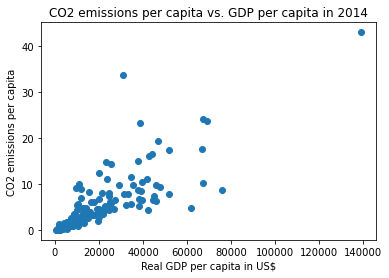

In [109]:

# Join co2 emission dataframe with gdp dataframe on entitiy
co2_gdp = co2_df.set_index('Entity').join(gdp_df.set_index('Entity'))

# Get gdp and co2 from joined dataframe and set to x and y values
xValues = co2_gdp[gdp_code]
yValues = co2_gdp[co2_code]


# Set up the pyplot as a scatterplot and map the lists xValues and yValues to respective axises
pyplot.scatter(xValues, yValues)
# Set up labels and title for the plot
pyplot.xlabel('Real GDP per capita in US$')
pyplot.ylabel('CO2 emissions per capita')
pyplot.title("CO2 emissions per capita vs. GDP per capita in 2014")
# Set a variable fig to point to the current figure (the scatter plot)
fig = pyplot.gcf()

# Draw and show the plot
pyplot.draw()
pyplot.show()
# Save the current figure into a png image with the name scatterplot
fig.savefig("scatterplotco2gdp")

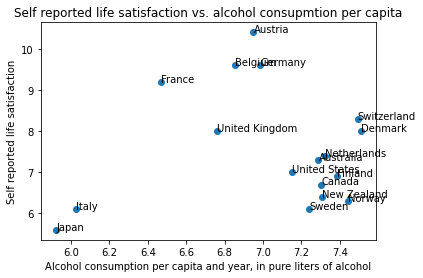

In [120]:
# Join alcohol consumption dataframe with happiness dataframe on entitiy
alcohol_happ_df = alcohol_df.set_index('Entity').join(happiness_df.set_index('Entity'))

# Get alcohol and happiness from joined dataframe and set to x and y values
xValues =  alcohol_happ_df[happ_code].values.tolist()
yValues = alcohol_happ_df[alc_code].values.tolist()
labels = alcohol_df['Entity'].values.tolist()

# Set up the pyplot as a scatterplot and map the lists xValues and yValues to respective axises
fig, ax = pyplot.subplots()

ax.scatter(xValues, yValues)

for i, txt in enumerate(labels):
    ax.annotate(txt, (xValues[i], yValues[i]))

# Set up labels and title for the plot
pyplot.xlabel('Alcohol consumption per capita and year, in pure liters of alcohol')
pyplot.ylabel('Self reported life satisfaction')
pyplot.title("Self reported life satisfaction vs. alcohol consupmtion per capita")
# Set a variable fig to point to the current figure (the scatter plot)
fig = pyplot.gcf()

# Draw and show the plot
pyplot.draw()
pyplot.show()
# Save the current figure into a png image with the name scatterplot
fig.savefig("scatterplotalcoholhappiness")



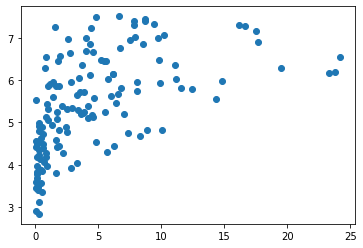

In [124]:
happiness_co2 = happiness_df.set_index('Entity').join(co2_df.set_index('Entity'))

xValues = happiness_co2[co2_code]
yValues = happiness_co2[happ_code]

pyplot.scatter(xValues, yValues)

pyplot.show()